In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from PIL import Image
import cv2 

In [3]:
X_meta = pd.read_csv("/kaggle/input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_Metadata.csv")
X_meta.head(10)

image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male
5  ISIC_0000006        25.0     posterior torso       NaN  female
6  ISIC_0000007        25.0     posterior torso       NaN  female
7  ISIC_0000008        30.0      anterior torso       NaN  female
8  ISIC_0000009        30.0      anterior torso       NaN  female
9  ISIC_0000010        35.0     posterior torso       NaN  female

In [4]:
X = pd.read_csv("../input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_GroundTruth.csv")
X.head(10)

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
5  ISIC_0000006  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
6  ISIC_0000007  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
7  ISIC_0000008  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
8  ISIC_0000009  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
9  ISIC_0000010  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

In [5]:
def gen_path(lesion, image_name):  # Функция, генерирующая путь к конкретной фотографии по названию и заболеванию
    return '/kaggle/input/isic-2019-skin-lesion-images-for-classification/' + lesion + '/' + image_name + '.jpg'

def show_image(lesion, image_name):  # Функция, выводящая картинку на экран
    image_name = gen_path(lesion, image_name)
    img = Image.open(image_name)
    return img

def lesion_from_image_name(image_name, data):  # функция возвращающая тип заболевания по названию картинки
    for i, value in enumerate(data[data['image'] == image_name].values[0]):
        if (value == 1): 
            return data.columns[i]
    
def image_view(image_name, data):  # Основная функция для показа картинки по названию
    a = show_image(lesion_from_image_name(image_name, data), image_name)
    print(a.size)
    return a

(576, 768)


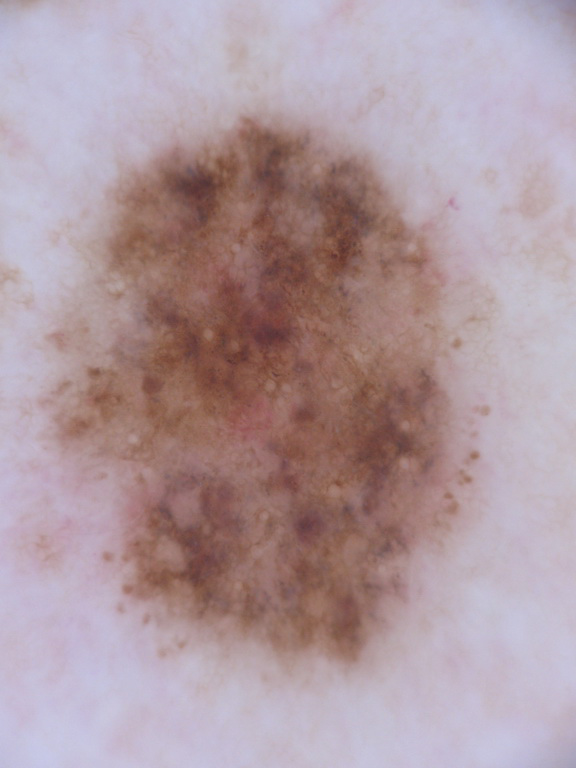

In [7]:
image_view('ISIC_0000243', X)

In [8]:
sample_set_NV = ['ISIC_0000000', 'ISIC_0000003', 'ISIC_0000008', 'ISIC_0000009', 'ISIC_0000014', 'ISIC_0000015', 'ISIC_0000017_downsampled', 'ISIC_0000018_downsampled' ]
sample_set_NV += ['ISIC_0000019_downsampled', 'ISIC_0000020_downsampled', 'ISIC_0000021_downsampled', 'ISIC_0000024_downsampled', 'ISIC_0000025_downsampled']
sample_set_NV += ['ISIC_0000027_downsampled', 'ISIC_0000028_downsampled', 'ISIC_0000034_downsampled', 'ISIC_0000037_downsampled', 'ISIC_0000038_downsampled']
sample_set_NV += ['ISIC_0000039_downsampled', 'ISIC_0000042_downsampled', 'ISIC_0000047_downsampled', 'ISIC_0000050_downsampled', 'ISIC_0000051_downsampled']
sample_set_NV += ['ISIC_0000053_downsampled', 'ISIC_0000055_downsampled', 'ISIC_0000057_downsampled', 'ISIC_0000058_downsampled', 'ISIC_0000059_downsampled']
sample_set_NV += ['ISIC_0000060_downsampled', 'ISIC_0000061_downsampled', 'ISIC_0000063_downsampled', 'ISIC_0000064_downsampled', 'ISIC_0000065_downsampled']
len(sample_set_NV)

33

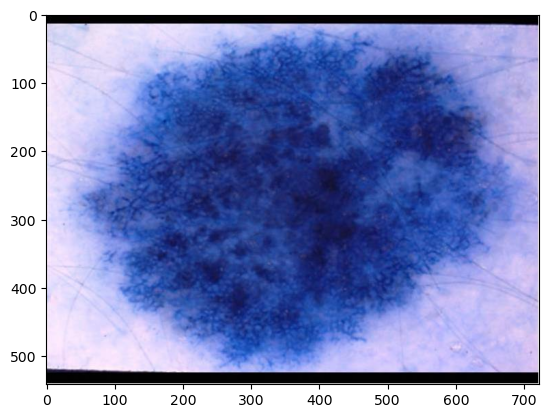

5526.000000000001
26598.0
[]
[ 23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.
  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49. 185.
 186. 187. 188. 189. 190. 191. 193. 194. 225. 245. 246. 247. 248. 249.
 250. 251. 252. 253. 254. 255.]
[ 11  27  31  34  37  46  51  57  60  67  69  72  74  83  87  90  92  95
  97  99 104 110 116 119 123 129 134 136 139 141 144 149 155 157 160 163
 168 175 179 187 190 193 195 200 203 206 215 217 219 224 231 235 237 251]


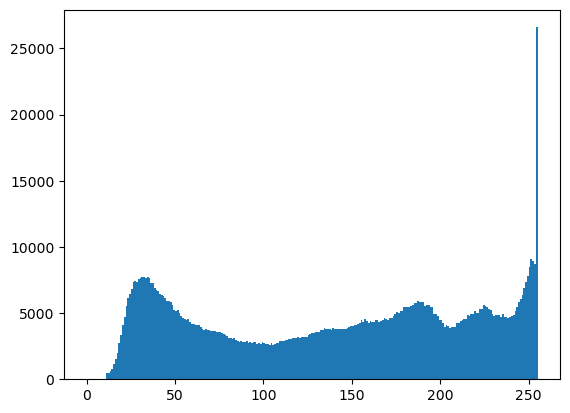

In [9]:
import plotly.express as px
image_name = gen_path('NV','ISIC_0000212' )
img = cv2.imread(image_name, 1)
#a = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img
plt.imshow(a)
plt.show()
b = a.ravel()
c = b[b > 10]
import numpy as np
from scipy.signal import argrelextrema, argrelmax

# fig = px.histogram(c, title = 'GRAYSCALE') ##градиенты, 
# fig.show()
n, bins, patches = plt.hist(c, bins = np.linspace(0, 255, 256))
bins = np.delete(bins, 0)
t = n[n>1000]
#print(bins[n>100])
m = np.quantile(t, 0.8)
print(m)
print(t.max())
print(bins[n == 39649.0])
print(bins[n>m])
# print(bins)
# print(n.max())
# print(1870363.0/2354791.0)
# print(n.sum())
# print(n[n>1000].sum())
# print(n[n > 1000])
# print(bins[n>1000])
tmp = argrelextrema(n, np.greater)[0]
print(tmp)

In [11]:
new_sample_set_MEL = ['ISIC_0000143_downsampled', 'ISIC_0000145_downsampled', 'ISIC_0000146_downsampled', 'ISIC_0000147_downsampled']
new_sample_set_MEL += ['ISIC_0000150_downsampled', 'ISIC_0000152_downsampled', 'ISIC_0000153_downsampled', 'ISIC_0000156_downsampled']
new_sample_set_MEL +=['ISIC_0000278', 'ISIC_0000294', 'ISIC_0000393_downsampled', 'ISIC_0000395_downsampled']
new_sample_set_MEL += ['ISIC_0000415_downsampled', 'ISIC_0000420_downsampled']
len(new_sample_set_MEL)

14

In [13]:
sample_set_MEL = ['ISIC_0000013', 'ISIC_0000022_downsampled', 'ISIC_0000026_downsampled', 'ISIC_0000029_downsampled', 'ISIC_0000035_downsampled', 'ISIC_0000040_downsampled']
sample_set_MEL += ['ISIC_0000046_downsampled', 'ISIC_0000049_downsampled', 'ISIC_0000054_downsampled', 'ISIC_0000056_downsampled', 'ISIC_0000142_downsampled']
len(sample_set_MEL)

11

In [14]:
tmp = X[['NV', 'image']].head(1000) 
tmp[tmp['NV'] == 1][180:190] # не берем 64,65,66

NV         image
234  1.0  ISIC_0000251
235  1.0  ISIC_0000252
236  1.0  ISIC_0000253
237  1.0  ISIC_0000254
238  1.0  ISIC_0000255
239  1.0  ISIC_0000256
240  1.0  ISIC_0000258
241  1.0  ISIC_0000259
242  1.0  ISIC_0000260
243  1.0  ISIC_0000261

In [15]:
new_sample_set_NV = ['ISIC_0000069', 'ISIC_0000073', 'ISIC_0000080_downsampled', 'ISIC_0000081_downsampled']
new_sample_set_NV += ['ISIC_0000082_downsampled', 'ISIC_0000085_downsampled', 'ISIC_0000086_downsampled', 'ISIC_0000087_downsampled']
new_sample_set_NV += ['ISIC_0000088_downsampled', 'ISIC_0000093_downsampled', 'ISIC_0000097_downsampled', 'ISIC_0000099_downsampled']
new_sample_set_NV += ['ISIC_0000107_downsampled', 'ISIC_0000108_downsampled', 'ISIC_0000109_downsampled', 'ISIC_0000111_downsampled' ]
new_sample_set_NV += ['ISIC_0000116_downsampled', 'ISIC_0000120_downsampled', 'ISIC_0000121_downsampled', 'ISIC_0000122_downsampled']
new_sample_set_NV += ['ISIC_0000123_downsampled', 'ISIC_0000124_downsampled', 'ISIC_0000126_downsampled', 'ISIC_0000127_downsampled']
new_sample_set_NV += ['ISIC_0000128_downsampled', 'ISIC_0000130_downsampled', 'ISIC_0000136_downsampled']
new_sample_set_NV += ['ISIC_0000137_downsampled', 'ISIC_0000179_downsampled', 'ISIC_0000189_downsampled', 'ISIC_0000191_downsampled']
new_sample_set_NV += ['ISIC_0000204_downsampled', 'ISIC_0000206_downsampled', 'ISIC_0000218_downsampled', 'ISIC_0000246']
new_sample_set_NV += ['ISIC_0000239', 'ISIC_0000240', 'ISIC_0000244', 'ISIC_0000245', 'ISIC_0000250', 'ISIC_0000258']
new_sample_set_NV += ['ISIC_0000260']
len(new_sample_set_NV )

42

(1024, 768)


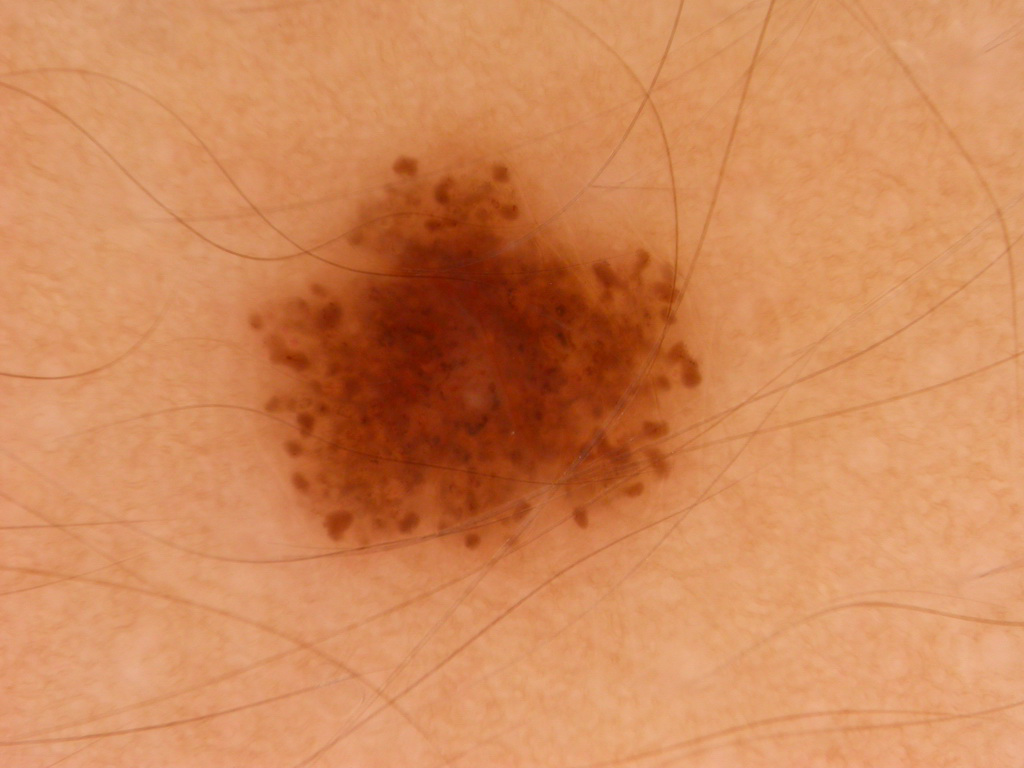

In [16]:
image_view('ISIC_0000260',X)

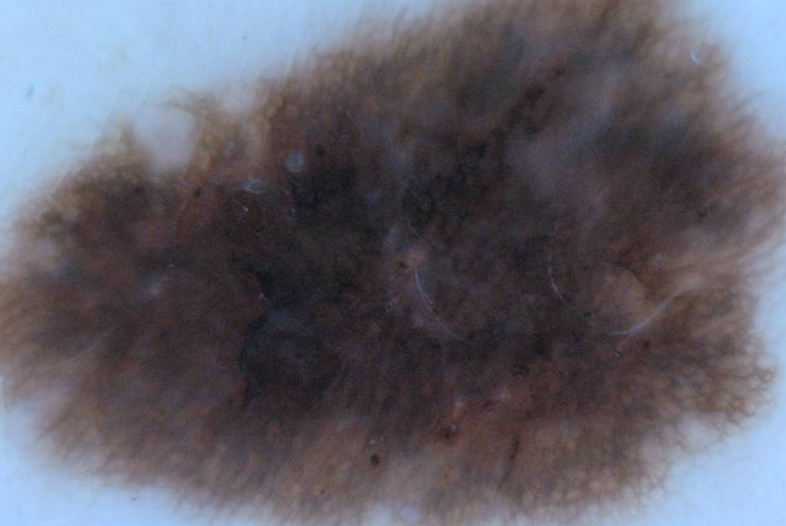

In [17]:
##[[90, 97], [876, 623], [315, 270], [671, 486], [1, 3], [135, 126],[151, 141], [318, 273]]
image_name = gen_path('NV','ISIC_0000000' )
img = Image.open(image_name)
crop_img1 = img.crop((img.size[0]/5,img.size[1]/5, img.size[0] - img.size[0]/5,img.size[1] - img.size[1]/5))
crop_img2 = crop_img1.crop((crop_img1.size[0]/4,crop_img1.size[1]/4,crop_img1.size[0] - crop_img1.size[0]/4,crop_img1.size[1] - crop_img1.size[1]/4))
display(img)
display(crop_img1)
display(crop_img2)
cr1 = img.crop((90,97,876,623))
display(cr1)

In [46]:
#[[90, 97], [876, 623], [315, 270], [671, 486], [1, 3], [135, 126],[184, 161], [386, 329],]
#image_name = gen_path('NV','ISIC_0000003' )
image_name = gen_path('NV','ISIC_0000003' )
img = cv2.imread(image_name, 1)
crop_img1 = img[97:623, 90:876]
crop_img2 = img[270:486, 315:671]
crop_img3 = img[3:126, 1:135]
crop_img4 = img[161:329, 184:386]
plt.imshow(img)
plt.show()
plt.imshow(crop_img1)
plt.show()
plt.imshow(crop_img2)
plt.show()
plt.imshow(crop_img3)
plt.show()
plt.imshow(crop_img4)
plt.show()

In [19]:
def get_cut_image(image_path):
    img = cv2.imread(image_path, 1)
    crop_img1 = img[97:623, 90:876]
    crop_img2 = img[270:486, 315:671]
    crop_img3 = img[3:126, 1:135]
    crop_img4 = img[161:329, 184:386]
    return [img, crop_img1, crop_img2, crop_img3, crop_img4]

In [21]:
import random
def automatic_cut_image(image_path):
    image1 = cv2.imread(image_path, 1)
    image_copy = image1.copy()
    black_pixel = 0
    height, width, _ = image1.shape

    for i in range(height):
        for j in range(width):
            if image1[i, j].sum() < 170 and (i - height / 2) ** 2 + (j - width / 2) ** 2 > (height / 2) ** 2 - 15000:
                black_pixel += 1
                image1[i, j] = [-1, -1, -1]

    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (7, 7), 0)

    thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 1001, 35)



    skin = cv2.bitwise_and(image1,image1,mask = thresh1)
    mask2 = cv2.bitwise_not(thresh1)
    lession = cv2.bitwise_and(image1,image1,mask = mask2)
    
    
    
    height, width = thresh1.shape
    if black_pixel > 2000:
        for i in range(height):
            for j in range(width):
                if thresh1[i, j].sum() < 120 and (i - height / 2) ** 2 + (j - width / 2) ** 2 > (height / 2) ** 2 - 15000:
                    thresh1[i, j] = 255





    contours, hierarchy = cv2.findContours(image=thresh1, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)


    tmp = 0
    tmp_index = 0
    for index, i in enumerate(contours):
        if len(i) > tmp and i[0][0][0] != 0 and i[0][0][1] != 0:
            tmp = len(i) - 1
            tmp_index = index

    result_skin_and_lession = []   
    diag = 100
    for i in range(7):
        if i == 6:
            break
        point = contours[tmp_index][random.randint(int(tmp/7 * i), int(tmp/7 * (i + 1)))]
        point = (point[0][0], point[0][1])
        temp_rectangle = thresh1[point[1] - diag:point[1] + diag, point[0] - diag:point[0] + diag]  # y:y+height, x:x+width
        temp_height, temp_width = temp_rectangle.shape
        black_count = 0
        all_count = 0
        for i in range(temp_height):
            for j in range(temp_width):
                if temp_rectangle[i, j] == 0:
                    black_count += 1
                all_count += 1
        if all_count != 0:
            result_skin_and_lession.append([black_count / all_count, point])
    t = 1
    for i in result_skin_and_lession:
        if np.abs(i[0]-0.5) < t:
            t = np.abs(i[0]-0.5)
            result_point = i[1]
    skin_and_lession = image1[result_point[1] - diag:result_point[1] + diag, result_point[0] - diag:result_point[0] + diag]
    return [image1, skin_and_lession, skin, lession]


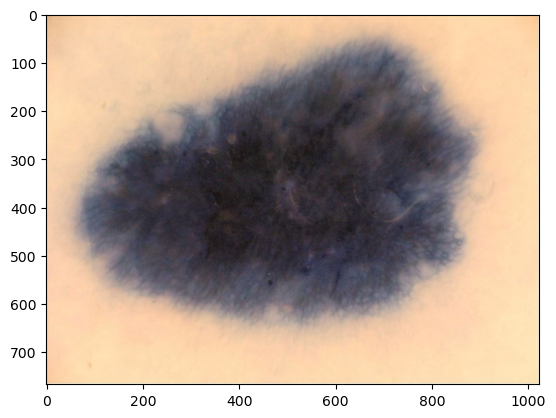

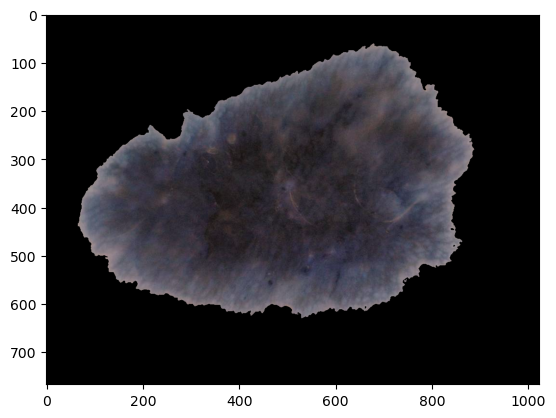

In [22]:
crop_img1, crop_img2, crop_img3, crop_img4 = automatic_cut_image('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/ISIC_0000000.jpg')
plt.imshow(crop_img1)
plt.show()
plt.imshow(crop_img2)
plt.show()
plt.imshow(crop_img3)
plt.show()
plt.imshow(crop_img4)
plt.show()

In [23]:
def cut_from_mask(image_path):
    image = cv2.imread(image_path, 1)
    image_mask = cv2.imread(image_path + 'mask', 1)
    

In [25]:
import cv2

img = cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/ISIC_0000000.jpg', 1)
img.ravel()
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
image_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
image_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)


In [10]:
## import cv2

img = cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/ISIC_0000000.jpg', 1)
img.ravel()
rgb_image =  cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = rgb_image

laplacian=cv2.Laplacian(img,cv2.CV_64F)
 # Параметр 1,0 предназначен для нахождения первой производной только по направлению x, а по максимуму можно найти вторую производную.
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
 # Параметр 0,1 предназначен для поиска первой производной только по направлению y, а по максимуму можно найти вторую производную.
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
sobelx2=cv2.Sobel(img,cv2.CV_64F,2,0,ksize=5)
 # Параметр 0,1 предназначен для поиска первой производной только по направлению y, а по максимуму можно найти вторую производную.
sobely2=cv2.Sobel(img,cv2.CV_64F,0,2,ksize=5)


# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Вы также можете установить параметр на -1
#sobelx8u = cv2.Sobel(img,-1,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

fig = plt.figure(figsize =(18, 10))
plt.subplot(3,3,1),plt.imshow(rgb_image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.imshow(laplacian)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,4),plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,5),plt.imshow(sobelx2)
plt.title('Sobel 2X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6),plt.imshow(sobely2)
plt.title('Sobel 2Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,7),plt.imshow(gray_image, cmap="gray")
plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,8),plt.imshow(sobelx8u)
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(sobel_8u)
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])



plt.show()

In [20]:
def collect_colors(img): #'/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/ISIC_0000000.jpg'
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = rgb_image
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    laplacian=cv2.Laplacian(img,cv2.CV_64F)
    sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    sobelx2=cv2.Sobel(img,cv2.CV_64F,2,0,ksize=5)
    sobely2=cv2.Sobel(img,cv2.CV_64F,0,2,ksize=5)
    sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    result = []
    ravel = rgb_image.ravel()
    result.append(ravel[ravel > 0])
    ravel = rgb_image[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = rgb_image[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = rgb_image[:,:,2].ravel()
    result.append(ravel[ravel > 0])
    
    ravel = gray_image.ravel()
    result.append(ravel[ravel > 0])
    
    ravel = laplacian.ravel()
    result.append(ravel[ravel > 0])
    ravel = laplacian[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = laplacian[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = laplacian[:,:,2].ravel()
    result.append(ravel[ravel > 0])
    
    ravel = sobelx.ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx[:,:,2].ravel()
    result.append(ravel[ravel > 0])
    
    ravel = sobely.ravel()
    result.append(ravel[ravel > 0])
    ravel = sobely[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobely[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobely[:,:,2].ravel()
    result.append(ravel[ravel > 0])

    ravel = sobelx2.ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx2[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx2[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx2[:,:,2].ravel()
    result.append(ravel[ravel > 0])
    
    ravel = sobely2.ravel()
    result.append(ravel[ravel > 0])
    ravel = sobely2[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobely2[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobely2[:,:,2].ravel()
    result.append(ravel[ravel > 0])
   
    ravel = sobelx8u.ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx8u[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx8u[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobelx8u[:,:,2].ravel()
    result.append(ravel[ravel > 0])
    
    ravel = sobel_8u.ravel()
    result.append(ravel[ravel > 0])
    ravel = sobel_8u[:,:,0].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobel_8u[:,:,1].ravel()
    result.append(ravel[ravel > 0])
    ravel = sobel_8u[:,:,2].ravel()
    result.append(ravel[ravel > 0])
    return result

In [21]:
def get_params(img):
    res = np.quantile(img,[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])
    res = np.append(res, np.min(img))
    res = np.append(res, np.mean(img))
    res = np.append(res, np.max(img))
    res = np.append(res, np.std(img))
    res = np.append(res, np.mode(img))
    res = np.append(res, np.median(img))
    return res

In [22]:
x = map(get_params, collect_colors('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/ISIC_0000000.jpg'))

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [36]:
def get_total_params(img_name):
    lesion = lesion_from_image_name(img_name, X)
    path = gen_path(lesion, img_name)
    cut_images = get_cut_image(path)
    result_params = []
    for img in cut_images:
        result_params += list(map(get_params,collect_colors(img)))
    total = []
    for params in result_params:
        total = np.hstack([total, params])
    total = np.append(total, img_name)
    return total

In [37]:
def get_auto_total_params(img_name):
    lesion = lesion_from_image_name(img_name, X)
    path = gen_path(lesion, img_name)
    cut_images = automatic_cut_image(path)
    result_params = []
    for img in cut_images:
        result_params += list(map(get_params,collect_colors(img)))
    total = []
    for params in result_params:
        total = np.hstack([total, params])
    total = np.append(total, img_name)
    return total

In [43]:
img_color = ['rbg_full', 'rgb_r', 'rgb_g', 'rgb_b', 'gray', 'laplacian_full', 'laplacian_r', 'laplacian_g', 'laplacian_b']
img_color += ['sobelx_full', 'sobelx_r', 'sobelx_g', 'sobelx_b', 'sobely_full', 'sobely_r',  'sobely_g', 'sobely_b']
img_color += ['sobelx2_full', 'sobelx2_r', 'sobelx2_g', 'sobelx2_b', 'sobely2_full', 'sobely2_r',  'sobely2_g', 'sobely2_b']
img_color += ['sobelx8u_full', 'sobelx8u_r', 'sobelx8u_g', 'sobelx8u_b', 'sobel_8u_full', 'sobel_8u_r',  'sobel_8u_g', 'sobel_8u_b']
columns = []
for j in range(1, 6):
    for k in range(33):
        columns += [str(j) + img_color[k] + '_Q' + str(i*5) for i in range(1, 20)]
        columns += [str(j) + img_color[k] + '_min', str(j) + img_color[k] + '_mean', str(j) + img_color[k] + '_max', str(j) + img_color[k] + '_std']
columns += ['image_name', 'target']
df = pd.DataFrame(columns = columns)
df

Empty DataFrame
Columns: [1rbg_full_Q5, 1rbg_full_Q10, 1rbg_full_Q15, 1rbg_full_Q20, 1rbg_full_Q25, 1rbg_full_Q30, 1rbg_full_Q35, 1rbg_full_Q40, 1rbg_full_Q45, 1rbg_full_Q50, 1rbg_full_Q55, 1rbg_full_Q60, 1rbg_full_Q65, 1rbg_full_Q70, 1rbg_full_Q75, 1rbg_full_Q80, 1rbg_full_Q85, 1rbg_full_Q90, 1rbg_full_Q95, 1rbg_full_min, 1rbg_full_mean, 1rbg_full_max, 1rbg_full_std, 1rgb_r_Q5, 1rgb_r_Q10, 1rgb_r_Q15, 1rgb_r_Q20, 1rgb_r_Q25, 1rgb_r_Q30, 1rgb_r_Q35, 1rgb_r_Q40, 1rgb_r_Q45, 1rgb_r_Q50, 1rgb_r_Q55, 1rgb_r_Q60, 1rgb_r_Q65, 1rgb_r_Q70, 1rgb_r_Q75, 1rgb_r_Q80, 1rgb_r_Q85, 1rgb_r_Q90, 1rgb_r_Q95, 1rgb_r_min, 1rgb_r_mean, 1rgb_r_max, 1rgb_r_std, 1rgb_g_Q5, 1rgb_g_Q10, 1rgb_g_Q15, 1rgb_g_Q20, 1rgb_g_Q25, 1rgb_g_Q30, 1rgb_g_Q35, 1rgb_g_Q40, 1rgb_g_Q45, 1rgb_g_Q50, 1rgb_g_Q55, 1rgb_g_Q60, 1rgb_g_Q65, 1rgb_g_Q70, 1rgb_g_Q75, 1rgb_g_Q80, 1rgb_g_Q85, 1rgb_g_Q90, 1rgb_g_Q95, 1rgb_g_min, 1rgb_g_mean, 1rgb_g_max, 1rgb_g_std, 1rgb_b_Q5, 1rgb_b_Q10, 1rgb_b_Q15, 1rgb_b_Q20, 1rgb_b_Q25, 1rgb_b_Q30, 1rgb_b_Q35, 1rgb_b_Q40, 1rgb_b_Q45, 1rgb_b_Q50, 1rgb_b_Q55, 1rgb_b_Q60, 1rgb_b_Q65, 1rgb_b_Q70, 1rgb_b_Q75, 1rgb_b_Q80, 1rgb_b_Q85, 1rgb_b_Q90, 1rgb_b_Q95, 1rgb_b_min, 1rgb_b_mean, 1rgb_b_max, 1rgb_b_std, 1gray_Q5, 1gray_Q10, 1gray_Q15, 1gray_Q20, 1gray_Q25, 1gray_Q30, 1gray_Q35, 1gray_Q40, ...]
Index: []

[0 rows x 3797 columns]

In [44]:
img_color = ['rbg_full', 'rgb_r', 'rgb_g', 'rgb_b', 'gray', 'laplacian_full', 'laplacian_r', 'laplacian_g', 'laplacian_b']
img_color += ['sobelx_full', 'sobelx_r', 'sobelx_g', 'sobelx_b', 'sobely_full', 'sobely_r',  'sobely_g', 'sobely_b']
img_color += ['sobelx2_full', 'sobelx2_r', 'sobelx2_g', 'sobelx2_b', 'sobely2_full', 'sobely2_r',  'sobely2_g', 'sobely2_b']
img_color += ['sobelx8u_full', 'sobelx8u_r', 'sobelx8u_g', 'sobelx8u_b', 'sobel_8u_full', 'sobel_8u_r',  'sobel_8u_g', 'sobel_8u_b']
columns = []
for j in range(1, 5):
    for k in range(33):
        columns += [str(j) + img_color[k] + '_Q' + str(i*5) for i in range(1, 20)]
        columns += [str(j) + img_color[k] + '_min', str(j) + img_color[k] + '_mean', str(j) + img_color[k] + '_max', str(j) + img_color[k] + '_std']
columns += ['image_name', 'target']
auto_df = pd.DataFrame(columns = columns)
auto_df

Empty DataFrame
Columns: [1rbg_full_Q5, 1rbg_full_Q10, 1rbg_full_Q15, 1rbg_full_Q20, 1rbg_full_Q25, 1rbg_full_Q30, 1rbg_full_Q35, 1rbg_full_Q40, 1rbg_full_Q45, 1rbg_full_Q50, 1rbg_full_Q55, 1rbg_full_Q60, 1rbg_full_Q65, 1rbg_full_Q70, 1rbg_full_Q75, 1rbg_full_Q80, 1rbg_full_Q85, 1rbg_full_Q90, 1rbg_full_Q95, 1rbg_full_min, 1rbg_full_mean, 1rbg_full_max, 1rbg_full_std, 1rgb_r_Q5, 1rgb_r_Q10, 1rgb_r_Q15, 1rgb_r_Q20, 1rgb_r_Q25, 1rgb_r_Q30, 1rgb_r_Q35, 1rgb_r_Q40, 1rgb_r_Q45, 1rgb_r_Q50, 1rgb_r_Q55, 1rgb_r_Q60, 1rgb_r_Q65, 1rgb_r_Q70, 1rgb_r_Q75, 1rgb_r_Q80, 1rgb_r_Q85, 1rgb_r_Q90, 1rgb_r_Q95, 1rgb_r_min, 1rgb_r_mean, 1rgb_r_max, 1rgb_r_std, 1rgb_g_Q5, 1rgb_g_Q10, 1rgb_g_Q15, 1rgb_g_Q20, 1rgb_g_Q25, 1rgb_g_Q30, 1rgb_g_Q35, 1rgb_g_Q40, 1rgb_g_Q45, 1rgb_g_Q50, 1rgb_g_Q55, 1rgb_g_Q60, 1rgb_g_Q65, 1rgb_g_Q70, 1rgb_g_Q75, 1rgb_g_Q80, 1rgb_g_Q85, 1rgb_g_Q90, 1rgb_g_Q95, 1rgb_g_min, 1rgb_g_mean, 1rgb_g_max, 1rgb_g_std, 1rgb_b_Q5, 1rgb_b_Q10, 1rgb_b_Q15, 1rgb_b_Q20, 1rgb_b_Q25, 1rgb_b_Q30, 1rgb_b_Q35, 1rgb_b_Q40, 1rgb_b_Q45, 1rgb_b_Q50, 1rgb_b_Q55, 1rgb_b_Q60, 1rgb_b_Q65, 1rgb_b_Q70, 1rgb_b_Q75, 1rgb_b_Q80, 1rgb_b_Q85, 1rgb_b_Q90, 1rgb_b_Q95, 1rgb_b_min, 1rgb_b_mean, 1rgb_b_max, 1rgb_b_std, 1gray_Q5, 1gray_Q10, 1gray_Q15, 1gray_Q20, 1gray_Q25, 1gray_Q30, 1gray_Q35, 1gray_Q40, ...]
Index: []

[0 rows x 3038 columns]

In [45]:
from datetime import datetime
import time

start_time = datetime.now()
print(start_time)
count = 0 
for i in sample_set_MEL: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_auto_total_params(i), 1])
    auto_df.loc[len(auto_df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
for i in sample_set_NV: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_auto_total_params(i), 0])
    auto_df.loc[len(auto_df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
for i in new_sample_set_MEL: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_auto_total_params(i), 1])
    auto_df.loc[len(auto_df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
for i in new_sample_set_NV: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_auto_total_params(i), 0])
    auto_df.loc[len(auto_df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)

print(datetime.now() - start_time)

2023-04-29 08:48:07.666897


KeyboardInterrupt: 

In [ ]:
auto_df

In [ ]:
from datetime import datetime
import time

start_time = datetime.now()
print(start_time)
count = 0 
for i in sample_set_MEL: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_total_params(i), 1])
    df.loc[len(df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
for i in new_sample_set_MEL: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_total_params(i), 1])
    df.loc[len(df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
for i in sample_set_NV: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_total_params(i), 0])
    df.loc[len(df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
for i in new_sample_set_NV: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    total = np.hstack([get_total_params(i), 0])
    df.loc[len(df.index)] = total
    count += 1
    if count % 10 == 0:
        print(count)
        
print(datetime.now() - start_time)

In [ ]:
pd.set_option('max_columns', 100)
df

In [53]:
df.to_csv('/kaggle/working/Table_MEL_NV_full1.csv', index=False)

In [54]:
auto_df.to_csv('/kaggle/working/Table_MEL_NV_auto_full1.csv', index=False)

In [47]:
auto_df = pd.read_csv("/kaggle/input/table-mel-nv/Table_MEL_NV_auto_full_new.csv")
df = pd.read_csv("/kaggle/input/table-mel-nv/Table_MEL_NV_full.csv")
image_names = []
for i in sample_set_MEL: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    image_names.append(i)
for i in sample_set_NV: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    image_names.append(i)
for i in new_sample_set_MEL: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    image_names.append(i)
for i in new_sample_set_NV: # делаем MEl таргет 1, NV таргет 0, но весь датасет состоит из заболеваний MEL и NV
    image_names.append(i)
auto_df['image_name'] = image_names
df['image_name'] = image_names
auto_df

1rbg_full_Q5  1rbg_full_Q10  1rbg_full_Q15  1rbg_full_Q20  1rbg_full_Q25  \
0           31.0           38.0           51.0           98.0          177.0   
1           66.0           90.0          110.0          125.0          137.0   
2           95.0          112.0          124.0          135.0          142.0   
3           28.0           34.0           41.0           50.0           65.0   
4           97.0          107.0          114.0          120.0          126.0   
..           ...            ...            ...            ...            ...   
95          72.0           96.0          121.0          137.0          147.0   
96          81.0           98.0          106.0          111.0          115.0   
97          32.0           59.0           85.0          106.0          116.0   
98          52.0           72.0           88.0          102.0          116.0   
99          36.0           75.0           92.0           99.0          104.0   

    1rbg_full_Q30  1rbg_full_Q35  1rbg_full_Q40  1rbg_full_Q45  1rbg_full_Q50  \
0           205.0          212.0          216.0          219.0          220.0   
1           144.0          150.0          153.0          156.0          158.0   
2           146.0          150.0          152.0          155.0          157.0   
3            84.0          125.0          182.0          205.0          212.0   
4           132.0          139.0          146.0          152.0          156.0   
..            ...            ...            ...            ...            ...   
95          154.0          160.0          165.0          168.0          171.0   
96          119.0          122.0          125.0          127.0          130.0   
97          125.0          134.0          142.0          150.0          155.0   
98          127.0          136.0          142.0          147.0          151.0   
99          109.0          115.0          125.0          142.0          148.0   

    ...  4sobel_8u_b_Q80  4sobel_8u_b_Q85  4sobel_8u_b_Q90  4sobel_8u_b_Q95  \
0   ...            161.0            179.0            200.0            225.0   
1   ...            183.0            199.0            216.0            235.0   
2   ...            143.0            161.0            186.0            216.0   
3   ...            167.0            185.0            205.0            228.0   
4   ...            182.0            198.0            216.0            235.0   
..  ...              ...              ...              ...              ...   
95  ...            180.0            197.0            214.0            234.0   
96  ...            156.0            175.0            197.0            225.0   
97  ...            172.0            190.0            209.0            231.0   
98  ...            190.0            205.0            221.0            238.0   
99  ...            161.0            180.0            201.0            225.0   

    4sobel_8u_b_min  4sobel_8u_b_mean  4sobel_8u_b_max  4sobel_8u_b_std  \
0               1.0         96.737652            255.0        67.529169   
1               1.0        109.621593            255.0        71.588542   
2               1.0         85.725925            255.0        64.663782   
3               1.0        100.067974            255.0        68.690147   
4               1.0        110.417862            255.0        71.182579   
..              ...               ...              ...              ...   
95              1.0        108.451455            255.0        71.059138   
96              1.0         93.131491            255.0        67.078736   
97              1.0        103.588535            255.0        69.734924   
98              1.0        115.751041            255.0        72.382060   
99              1.0         97.042349            255.0        67.733131   

    target                image_name  
0      1.0              ISIC_0000013  
1      1.0  ISIC_0000022_downsampled  
2      1.0  ISIC_0000026_downsampled  
3      1.0  ISIC_0000029_downsampled  
4      1.0  ISIC_0000035_

In [48]:
df

1rbg_full_Q5  1rbg_full_Q10  1rbg_full_Q15  1rbg_full_Q20  1rbg_full_Q25  \
0           31.0           38.0           51.0           98.0          177.0   
1           64.0           89.0          108.0          124.0          136.0   
2           93.0          111.0          123.0          134.0          142.0   
3           27.0           33.0           40.0           49.0           63.0   
4           94.0          106.0          113.0          120.0          125.0   
..           ...            ...            ...            ...            ...   
95          72.0           96.0          121.0          137.0          147.0   
96          81.0           97.0          106.0          111.0          115.0   
97          31.0           58.0           84.0          106.0          116.0   
98          51.0           71.0           87.0          101.0          116.0   
99          35.0           74.0           92.0           99.0          104.0   

    1rbg_full_Q30  1rbg_full_Q35  1rbg_full_Q40  1rbg_full_Q45  1rbg_full_Q50  \
0           205.0          212.0          216.0          219.0          220.0   
1           144.0          149.0          153.0          156.0          158.0   
2           146.0          149.0          152.0          154.0          157.0   
3            82.0          120.0          177.0          204.0          212.0   
4           131.0          138.0          145.0          151.0          155.0   
..            ...            ...            ...            ...            ...   
95          154.0          160.0          165.0          168.0          171.0   
96          118.0          122.0          124.0          127.0          130.0   
97          125.0          134.0          142.0          149.0          155.0   
98          127.0          135.0          142.0          147.0          151.0   
99          109.0          114.0          125.0          142.0          148.0   

    ...  5sobel_8u_b_Q80  5sobel_8u_b_Q85  5sobel_8u_b_Q90  5sobel_8u_b_Q95  \
0   ...            163.0           181.00            202.0            226.0   
1   ...            166.0           184.00            205.0            229.0   
2   ...            108.0           124.00            146.0            180.0   
3   ...            169.0           187.00            207.0            230.0   
4   ...            179.0           195.00            213.0            232.0   
..  ...              ...              ...              ...              ...   
95  ...            167.0           184.00            204.0            227.0   
96  ...            159.0           178.00            199.0            224.0   
97  ...            172.0           188.00            208.0            230.0   
98  ...            191.0           206.75            222.0            239.0   
99  ...            155.0           173.00            193.0            219.0   

    5sobel_8u_b_min  5sobel_8u_b_mean  5sobel_8u_b_max  5sobel_8u_b_std  \
0               0.0         95.858911            255.0        69.414988   
1               0.0         97.338844            255.0        69.859391   
2               0.0         65.798120            255.0        55.049045   
3               0.0         99.729137            255.0        70.245519   
4               0.0        106.723715            255.0        71.271383   
..              ...               ...              ...              ...   
95              0.0         99.890588            255.0        68.965554   
96              0.0         92.677422            255.0        68.990862   
97              0.0        102.306665            255.0        70.089836   
98              0.0        114.922531            255.0        73.624718   
99              0.0         92.938413            255.0        66.220496   

    target                image_name  
0      1.0              ISIC_0000013  
1      1.0  ISIC_0000022_downsampled  
2      1.0  ISIC_0000026_downsampled  
3      1.0  ISIC_0000029_downsampled  
4      1.0  ISIC_0000035_